### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

### Load the trimmed data 

In [5]:
path = "/Users/ecem/Desktop/phonocardiogram/data/PV/absent"
waves = np.load(path + "/absent_PV_waves_10sec.npy", allow_pickle= True)

In [6]:
waves.shape

(5743, 40000)

## Let's look at wavelet decomposition for a signal piece

#### how our decomposition filter values look like

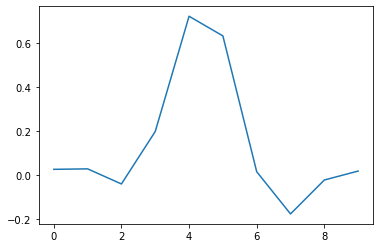

In [7]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(waves[0], w, level=6)

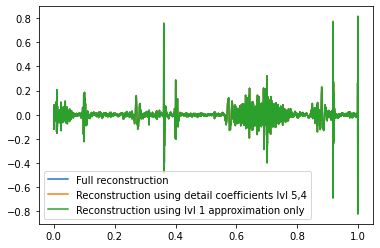

In [8]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

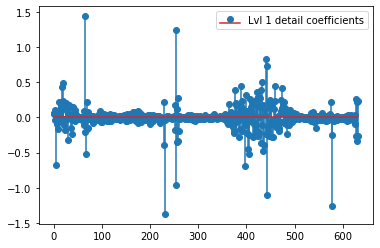

In [9]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])

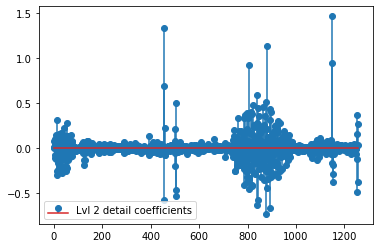

In [10]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


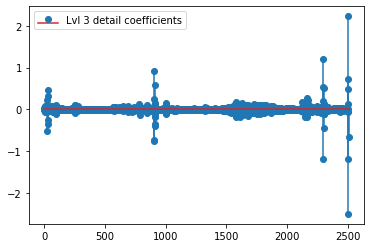

In [11]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


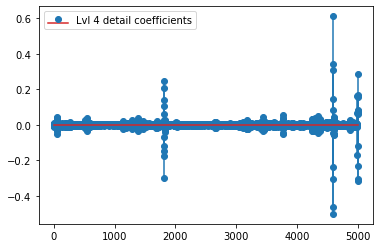

In [12]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


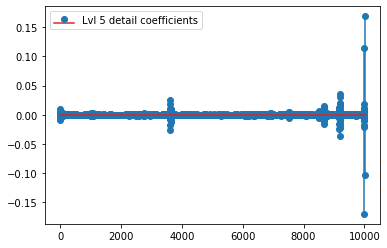

In [13]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


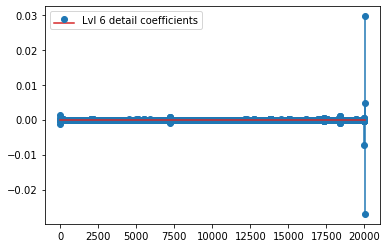

In [14]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [15]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, len(waves[0])), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
x_without_lvl1approx = waves[0] - approx_lvl1_interp

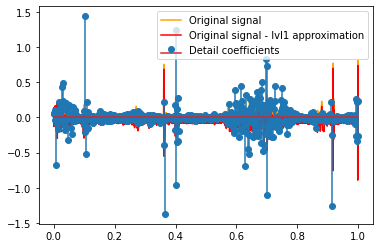

In [16]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(waves[0], color='orange')
reconstruction_plot(x_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

In [17]:
import pandas as pd

In [18]:
type(pywt.wavedec(waves[0], w, level=6))

list

In [19]:
coef = []
for i in range(len(waves)):
    coef.append(pywt.wavedec(waves[i], w, level=6))

In [20]:
for i in range(7):
    print(coef[0][i].shape)

(633,)
(633,)
(1258,)
(2508,)
(5007,)
(10006,)
(20004,)


In [21]:
coef[0]

[array([ 4.09316421e-01,  6.41358614e-01,  5.63254118e-01,  2.05387115e-01,
        -5.05265109e-02,  9.31221172e-02,  1.64840028e-01,  8.24626833e-02,
         5.59288152e-02,  8.83577242e-02, -6.50041178e-02,  5.34729064e-02,
        -5.83175384e-02, -1.48330927e-01, -1.50374994e-01, -6.59716278e-02,
        -1.02796659e-01, -3.40691060e-02, -4.76212986e-02,  9.53118037e-03,
         1.10860124e-01,  1.21063739e-02,  5.28908223e-02,  9.21801105e-02,
         3.52397859e-02,  3.53359319e-02, -1.25394976e-02,  1.35293230e-01,
        -8.46513957e-02, -4.42112833e-02,  1.04500689e-01, -9.83858481e-02,
         5.26231304e-02,  9.27399173e-02, -8.24524611e-02, -4.21873927e-02,
         6.45908713e-02,  2.00255737e-02, -5.99519871e-02,  9.92701389e-03,
         3.69836614e-02, -7.22702518e-02,  3.15663777e-02, -8.26152489e-02,
         3.10904291e-02, -2.36851014e-02,  7.29882438e-03, -3.40877064e-02,
         6.88925292e-03, -2.92382427e-02,  3.17056365e-02, -1.69537012e-02,
        -2.8

In [22]:
coef[1]

[array([-2.44351506e+00, -2.67788935e+00, -2.48372078e+00, -1.62889183e+00,
         5.15896976e-01, -4.11818475e-02,  3.42048481e-02,  1.49102420e-01,
        -6.57408834e-01,  6.82430446e-01, -9.95128870e-01,  7.65645087e-01,
         6.57254338e-01,  4.99035031e-01, -4.47541595e-01, -5.04517496e-01,
        -2.46497318e-02,  5.25905080e-02,  1.74940024e-02,  5.74900471e-02,
        -3.71872373e-02, -3.81481461e-02, -6.08967617e-03, -1.17573142e-02,
        -3.85253616e-02, -7.25683421e-02,  1.79420784e-02, -7.48697966e-02,
        -1.64828580e-02, -8.87143537e-02, -6.34937314e-03,  4.18603033e-01,
        -2.80313581e-01, -3.98475938e-02, -1.11145072e-01,  7.25497380e-02,
         1.21925995e-01,  6.96990266e-02, -1.10627729e-02,  9.19492319e-02,
         1.06493600e-01,  3.57197039e-02,  2.84350235e-02, -1.99962184e-02,
        -7.89638087e-02, -7.20576420e-02, -1.73398137e-01,  4.26631182e-01,
        -2.96970665e-01, -1.51276082e-01, -1.12832144e-01, -3.14472876e-02,
         6.5

### Level by level

In [23]:
def level_coef_extractor_3d(array, lvl = 0):
    array =np.array(array)
    
    lenn = array[0][lvl].shape[0] #48
    coef = np.ones(shape = (array.shape[0],lenn)) #2392,48
    
    for i in range(array.shape[0]):
        coef[i,:] = array[i][lvl]
        
    return coef

In [24]:
def saver(array = 0, lvl = 0, dir_path = None, name = 'blank'):
    coefs = level_coef_extractor_3d(array, lvl)
    np.save(dir_path + "/"+ str(name) + "_lvl_"  + str(lvl), coefs, allow_pickle = True)
    del coefs

In [25]:
for i in range(7):
    saver(coef, i, path, 'absent_PV_wavelet_coef')


In [26]:
waves_ = np.load(path+ "/absent_PV_wavelet_coef_lvl_0.npy",  allow_pickle = True)

In [27]:
waves_.shape

(5743, 633)